<a href="https://colab.research.google.com/github/diegovalensuela/datascience/blob/master/Qual_A_Melhor_Plataforma_de_Streaming_de_V%C3%ADdeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# importanto as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
series = pd.read_csv('https://raw.githubusercontent.com/diegovalensuela/datascience/master/Datasets/Series%20de%20TV/tv_shows.csv')
# https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

In [141]:
print('# Dimensões do DataFrame:')
print('Linhas = {}'.format(series.shape[0]))
print('Colunas = {}\n'.format(series.shape[1]))
series.head()

# Dimensões do DataFrame:
Linhas = 5611
Colunas = 11



,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [142]:
# removendo o caracter de porcertagem da coluna Rotten Tomatoes
series['Rotten Tomatoes'] = series['Rotten Tomatoes'].apply(lambda x: str(x).replace('%',''))

In [143]:
# verificar o tipo de dado de cada coluna
series.dtypes

Unnamed: 0           int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object

In [144]:
# alterando o tipo de dado da coluna Rotten Tomatoes para float64
series['Rotten Tomatoes'] = series['Rotten Tomatoes'].astype('float64')

# deixando a coluna Rotten Tomatoes no mesmo padrão de notas do IMDb, ou seja, de 0 a 10
series['Rotten Tomatoes'] = series['Rotten Tomatoes'].apply(lambda x: x/10)

In [145]:
# verificar uma série de cada plataforma
series.loc[[1583,1946,3572,5523]]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
1583,1583,Daughters of Destiny,2017,NaN,NaN,NaN,1,0,0,0,1
1946,1946,The Handmaid's Tale,2017,18+,8.5,8.8,0,1,0,0,1
3572,3572,The Boys,2019,18+,8.7,8.4,0,0,1,0,1
5523,5523,Amphibia,2019,7+,7.9,NaN,0,0,0,1,1


Podemos verificar que o dataset possui valores NaN, isso mostra que há dados faltantes e precisam ser tratados para não prejudicar a análise. Vamos verificar a quantidade de dados faltantes para cada coluna do dataset.

In [146]:
# analisando a porcentagem de valores faltantes para cada coluna
series.isnull().sum() / len(series['Title']) *100

Unnamed: 0          0.000000
Title               0.000000
Year                0.000000
Age                43.592942
IMDb               20.691499
Rotten Tomatoes    81.981821
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
type                0.000000
dtype: float64

A coluna com avaliações do Rotten Tomatoes está com quase 82% das séries sem avaliações. É uma boa parte das series e não podemos apenas excluir essas linhas.

Para tratar esses dados ausentes, tanto do Rotten Tomatoes quanto do IMDb, iremos preencher os campos faltantes de acordo com as notas por plataforma. Ou seja, pegar a mediana das avaliações de cada plataforma, fazer a media e substituir os valores NaN por essa media que será calculada.


In [147]:
# seperar as avaliações por plataforma
netflix_notas = series.loc[(series['Netflix']==1)]
hulu_notas = series.loc[(series['Hulu']==1) & (series['Netflix']==0)]
prime_notas = series.loc[(series['Prime Video']==1) & (series['Netflix']==0) & (series['Hulu']==0)]
disney_notas = series.loc[(series['Disney+']==1) & (series['Netflix']==0) & (series['Hulu']==0) & (series['Prime Video']==0)]

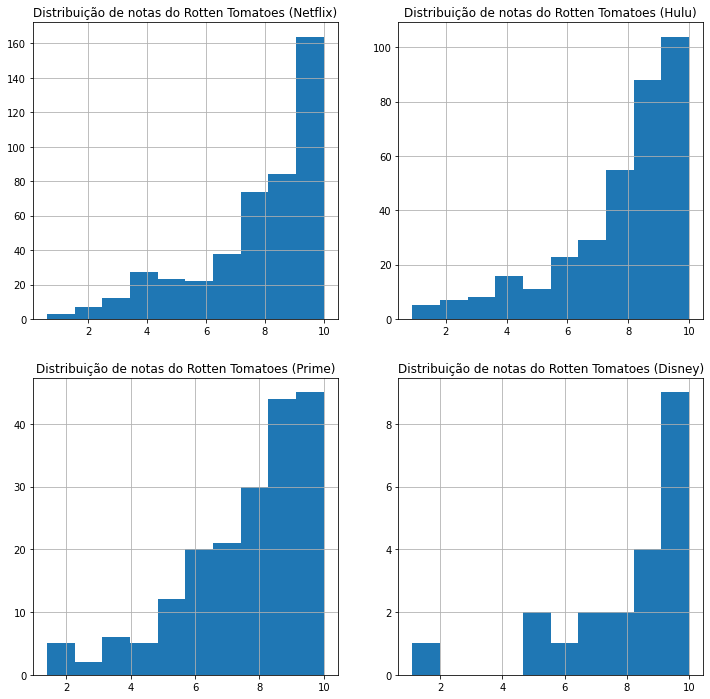

In [148]:
# visualizar a distribuição de notas da variavel Rotten Tomatoes
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
fig = netflix_notas['Rotten Tomatoes'].hist()
fig.set_title('Distribuição de notas do Rotten Tomatoes (Netflix)')

plt.subplot(2,2,2)
fig = hulu_notas['Rotten Tomatoes'].hist()
fig.set_title('Distribuição de notas do Rotten Tomatoes (Hulu)')

plt.subplot(2,2,3)
fig = prime_notas['Rotten Tomatoes'].hist();
fig.set_title('Distribuição de notas do Rotten Tomatoes (Prime)')

plt.subplot(2,2,4)
fig = disney_notas['Rotten Tomatoes'].hist()
fig.set_title('Distribuição de notas do Rotten Tomatoes (Disney)');

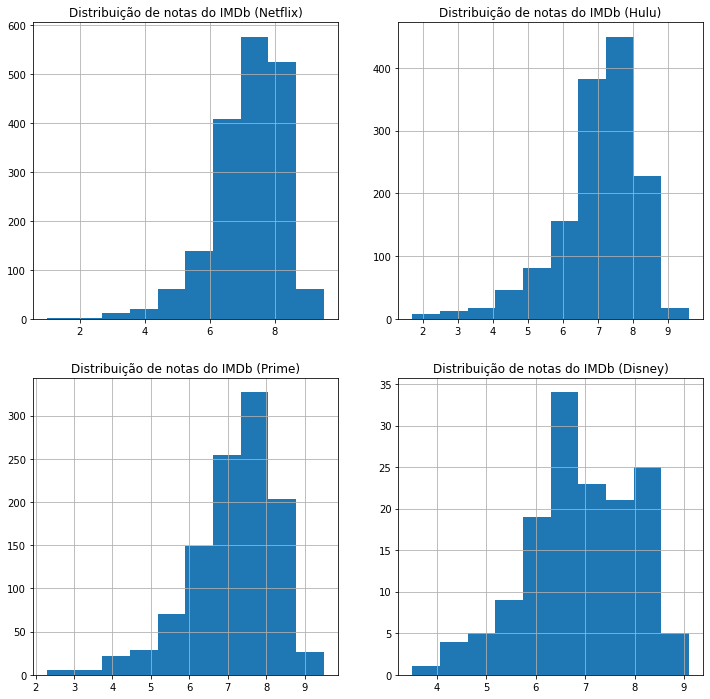

In [149]:
# visualizar a distribuição de notas da variavel IMDb
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
fig = netflix_notas['IMDb'].hist()
fig.set_title('Distribuição de notas do IMDb (Netflix)')

plt.subplot(2,2,2)
fig = hulu_notas['IMDb'].hist()
fig.set_title('Distribuição de notas do IMDb (Hulu)')

plt.subplot(2,2,3)
fig = prime_notas['IMDb'].hist();
fig.set_title('Distribuição de notas do IMDb (Prime)')

plt.subplot(2,2,4)
fig = disney_notas['IMDb'].hist()
fig.set_title('Distribuição de notas do IMDb (Disney)');

In [150]:
# pegar a mediana de cada plataforma na coluna Rotten Tomatoes
netflix_mediana = netflix_notas['Rotten Tomatoes'].median()
hulu_mediana = hulu_notas['Rotten Tomatoes'].median()
prime_mediana = prime_notas['Rotten Tomatoes'].median()
disney_mediana = disney_notas['Rotten Tomatoes'].median()

In [151]:
# fazer a media geral das avaliações do Rotten Tomatoes de todas as plataformas
media_rotten = round(np.mean([netflix_mediana, hulu_mediana, prime_mediana, disney_mediana]), 1)
print('Média geral a ser preenchida nos campos nulos = {}'.format(media_rotten))

Média geral a ser preenchida nos campos nulos = 8.3


In [152]:
# pegar a mediana de cada plataforma na coluna IMDb
netflix_mediana_netflix = netflix_notas['IMDb'].median()
hulu_mediana_hulu = hulu_notas['IMDb'].median()
prime_mediana_imdb = prime_notas['IMDb'].median()
disney_mediana_imdb = disney_notas['IMDb'].median()

In [153]:
# fazer a media geral das avaliações do Rotten Tomatoes de todas as plataformas
media_imdb = round(np.mean([netflix_mediana_imdb, hulu_mediana_imdb, prime_mediana_imdb, disney_mediana_imdb]), 1)
print('Média geral a ser preenchida nos campos nulos da coluna IMDb = {}'.format(media_imdb))

Média geral a ser preenchida nos campos nulos da coluna IMDb = 7.2


Sabendo agora os valores que serão preenchidos onde não há avaliações, vamos fazer a substituição no nosso dataset para partir para a finalização da análise.

In [154]:
# substituindo os valores nulos pelas medias calculadas
series['Rotten Tomatoes'] = series['Rotten Tomatoes'].fillna(media_rotten)
series['IMDb'] = series['IMDb'].fillna(media_imdb)

In [155]:
# verificar novamente uma série de cada plataforma
series.loc[[1583,1946,3572,5523]]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
1583,1583,Daughters of Destiny,2017,NaN,7.2,8.3,1,0,0,0,1
1946,1946,The Handmaid's Tale,2017,18+,8.5,8.8,0,1,0,0,1
3572,3572,The Boys,2019,18+,8.7,8.4,0,0,1,0,1
5523,5523,Amphibia,2019,7+,7.9,8.3,0,0,0,1,1


In [156]:
# analisando a porcentagem de valores faltantes para cada coluna
series.isnull().sum() / len(series['Title']) *100

Unnamed: 0          0.000000
Title               0.000000
Year                0.000000
Age                43.592942
IMDb                0.000000
Rotten Tomatoes     0.000000
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
type                0.000000
dtype: float64

In [157]:
 # descrição estatistica geral sobre o dataset
series.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5611.0,2805.000000,1619.900511,0.0,1402.5,2805.0,4207.5,5610.0
Year,5611.0,2011.021030,11.005116,1901.0,2010.0,2015.0,2017.0,2020.0
IMDb,5611.0,7.131207,1.008748,1.0,6.8,7.2,7.7,9.6
Rotten Tomatoes,5611.0,8.200980,0.898329,0.6,8.3,8.3,8.3,10.0
Netflix,5611.0,0.344145,0.475131,0.0,0.0,0.0,1.0,1.0
Hulu,5611.0,0.312600,0.463594,0.0,0.0,0.0,1.0,1.0
Prime Video,5611.0,0.382107,0.485946,0.0,0.0,0.0,1.0,1.0
Disney+,5611.0,0.032080,0.176228,0.0,0.0,0.0,0.0,1.0
type,5611.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Com essa descrição estatistica geral do dataset, podemos observar que a coluna *type* é formada completamente por um unico valor, já que o std(standard deviation) Desvio Padrão é igual e zero. Agora que já tratamos as colunas fundamentais, vamos remover as que não são necessárias.

In [158]:
# remover variaveis sem importancia para esta analise
series.drop('Unnamed: 0', inplace=True, axis=1)
series.drop('Year', inplace=True, axis=1)
series.drop('type', inplace=True, axis=1)
series.drop('Age', inplace=True, axis=1)

In [159]:
series.head()

,Title,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,9.5,9.6,1,0,0,0
1,Stranger Things,8.8,9.3,1,0,0,0
2,Money Heist,8.4,9.1,1,0,0,0
3,Sherlock,9.1,7.8,1,0,0,0
4,Better Call Saul,8.7,9.7,1,0,0,0


In [160]:
# separando as avaliações por plataforma, agora sem valores nulos
netflix_series = series.loc[(series['Netflix']==1)]
hulu_series = series.loc[(series['Hulu']==1) & (series['Netflix']==0)]
prime_series = series.loc[(series['Prime Video']==1) & (series['Netflix']==0) & (series['Hulu']==0)]
disney_series = series.loc[(series['Disney+']==1) & (series['Netflix']==0) & (series['Hulu']==0) & (series['Prime Video']==0)]

In [161]:
# validar a média final de cada plataforma no Rotten Tomatoes
netflix_final = np.mean(netflix_series['Rotten Tomatoes'])
hulu_final = np.mean(hulu_series['Rotten Tomatoes'])
prime_final = np.mean(prime_series['Rotten Tomatoes'])
disney_final = np.mean(disney_series['Rotten Tomatoes'])

# validar a média final de cada plataforma no IMDb
netflix_final_imdb = np.mean(netflix_series['IMDb'])
hulu_final_imdb = np.mean(hulu_series['IMDb'])
prime_final_imdb = np.mean(prime_series['IMDb'])
disney_final_imdb = np.mean(disney_series['IMDb'])

In [162]:
print("Nota final de séries da netflix = {}".format(round(np.mean([netflix_final, netflix_final_imdb]), 2)))
print("Nota final de séries da Hulu = {}".format(round(np.mean([hulu_final, hulu_final_imdb]), 2)))
print("Nota final de séries do Prime Video = {}".format(round(np.mean([prime_final, prime_final_imdb]), 2)))
print("Nota final de séries da Disney = {}".format(round(np.mean([disney_final, disney_final_imdb]), 2)))

Nota final de séries da netflix = 7.67
Nota final de séries da Hulu = 7.62
Nota final de séries do Prime Video = 7.71
Nota final de séries da Disney = 7.59
